# US Based bike-sharing BoomBikes 
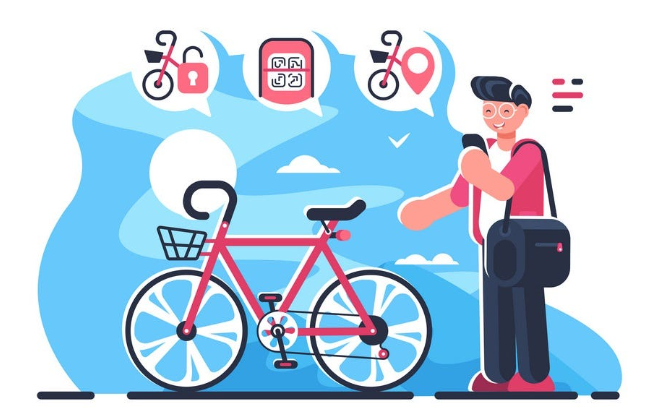

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataframe libraries
import numpy as np
import pandas as pd

# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Read dataset
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#Changing the column names
bike.rename(columns={'hum':'Humidity', 'mnth':'Month', 'yr':'Year', 'cnt':'Count'}, inplace=True)
bike.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Dropping the unnecessary columns
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

# Converting into catagorical data type

In [10]:
#Season
bike.season.replace((1,2,3,4),('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
bike.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

#year
bike.Year.replace((0,1),(2018,2019), inplace=True)
bike.Year.value_counts()

In [11]:
#month
bike.Month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'),
                   inplace=True)
bike.Month.value_counts()

Month
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [12]:
#weekday
bike.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True)
bike.weekday.value_counts()

weekday
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: count, dtype: int64

In [13]:
#weathersit
bike.weathersit.replace((1,2,3,4),('Clear', 'Mist', 'Light Snow', 'Heavy Rain'), inplace=True)
bike.weathersit.value_counts()

weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

# Analyzing the catagorical variables

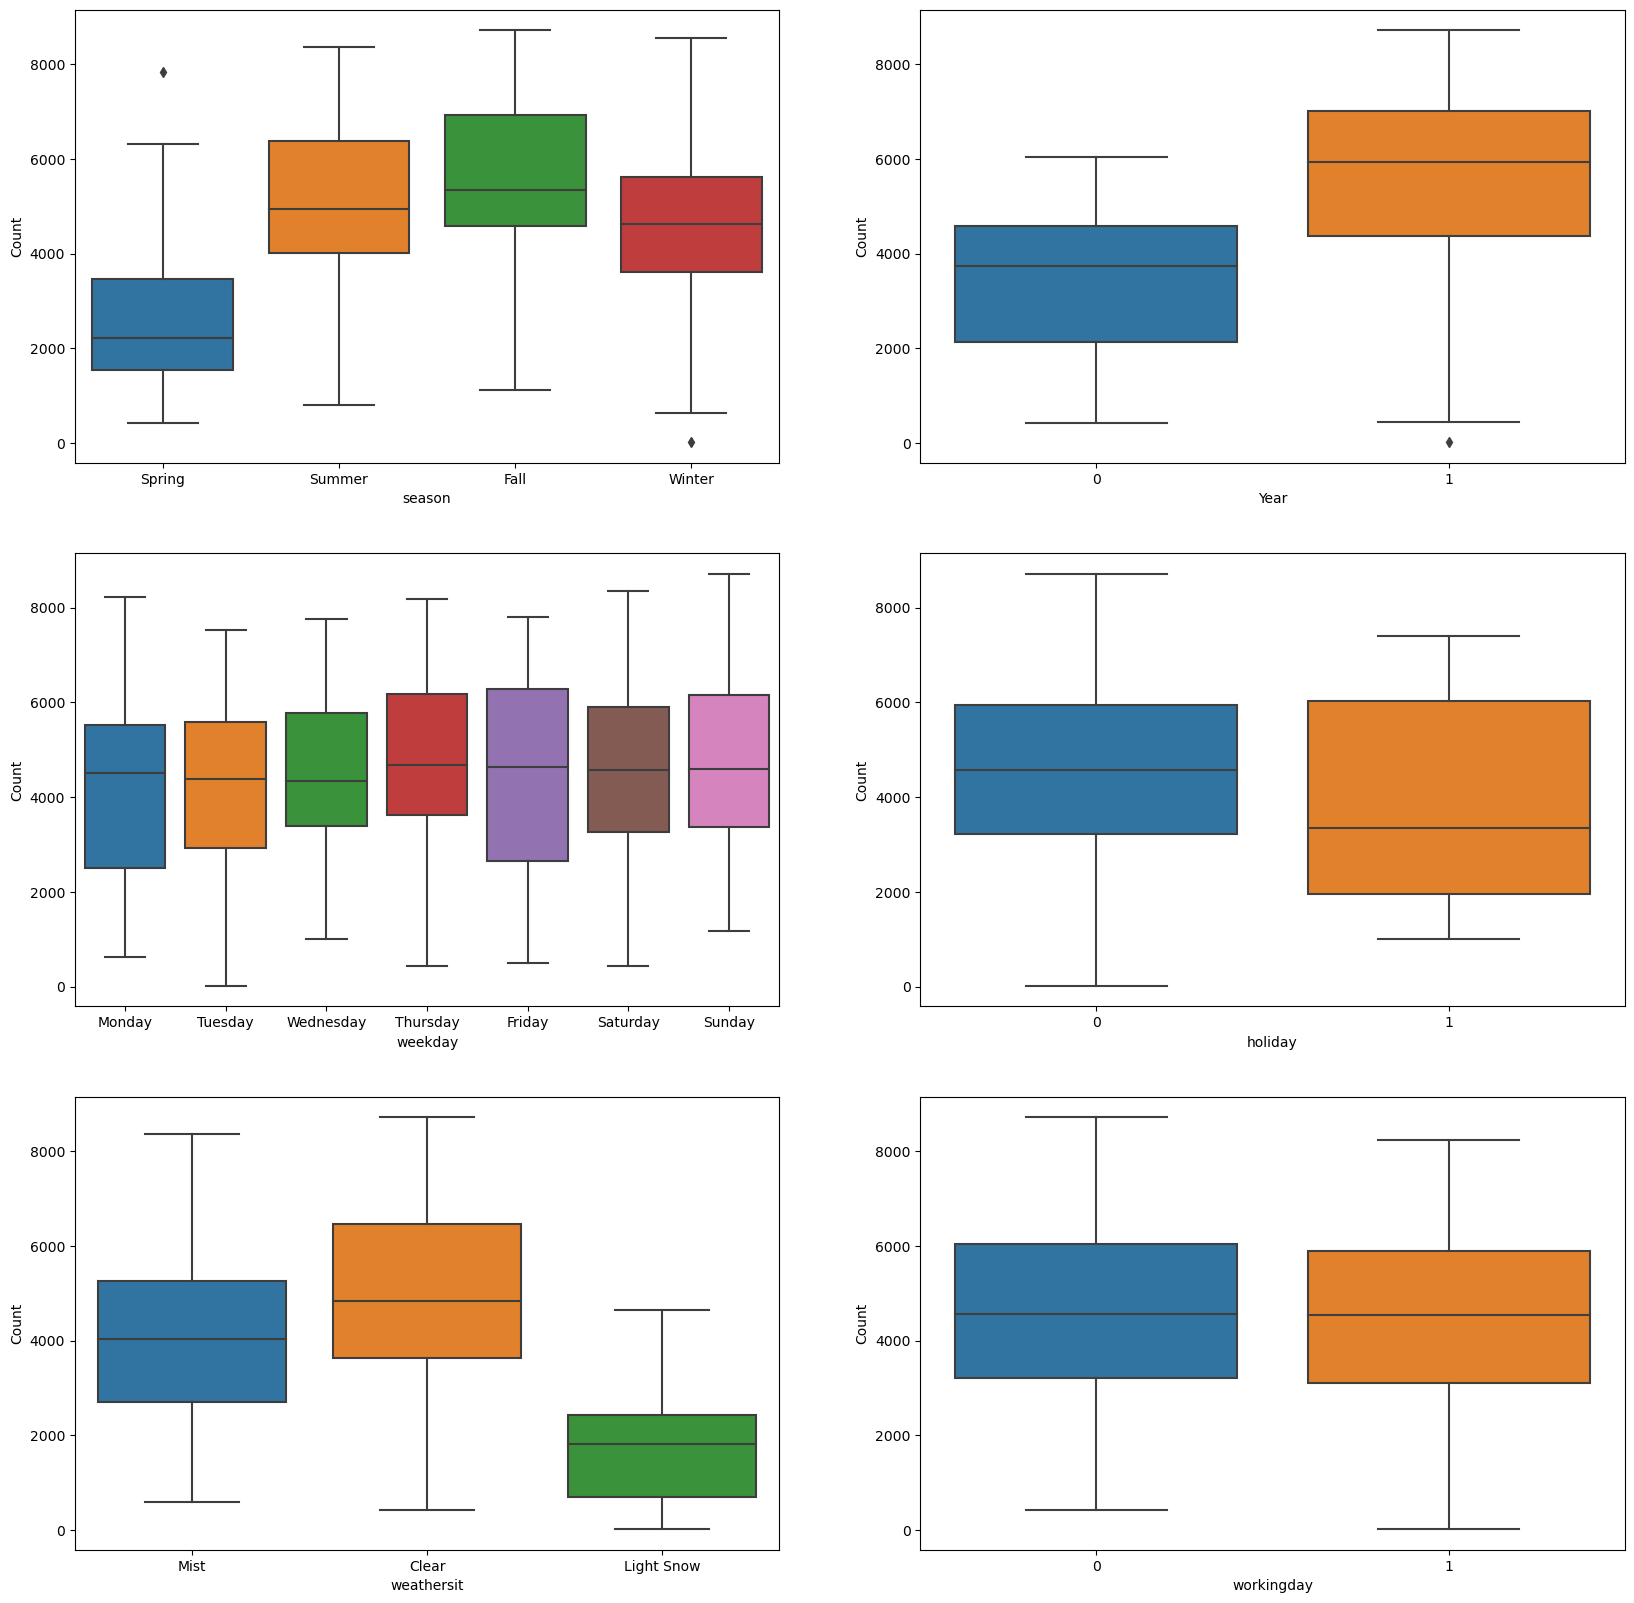

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x="season", y="Count", data=bike)
plt.subplot(3,2,2)
sns.boxplot(x="Year", y="Count", data=bike)
plt.subplot(3,2,3)
sns.boxplot(x="weekday", y="Count", data=bike)
plt.subplot(3,2,4)
sns.boxplot(x="holiday", y="Count", data=bike)
plt.subplot(3,2,5)
sns.boxplot(x="weathersit", y="Count", data=bike)
plt.subplot(3,2,6)
sns.boxplot(x="workingday", y="Count", data=bike)
plt.show()

Observations
1. In Fall there is significant increase than other season.
2. The business is gaining popularity year by year and hence there is increase in 2019.
3. There is not much impact of weekdays but it is performing little well on Fridays.
4. More bike rentals took place during non-holiday time.
5. It is getting more used in case of clear weather.
6. If it is working day people are using it more might be for going office, college or school.

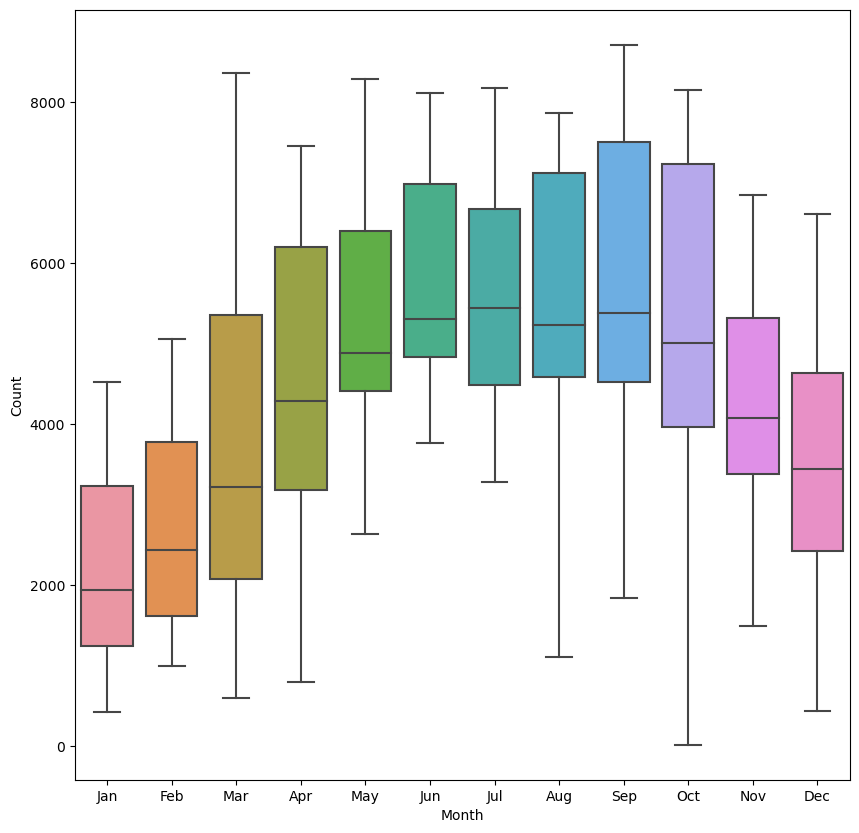

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Month", y="Count", data=bike)
plt.show()

It was getting more popularity in the middle of the months but then there is a decline.

# Analyzing the continuous variables

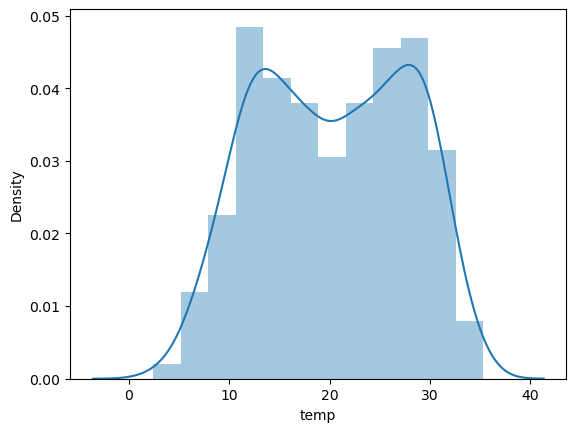

In [16]:
# temprature
sns.distplot(bike['temp'])
plt.show()

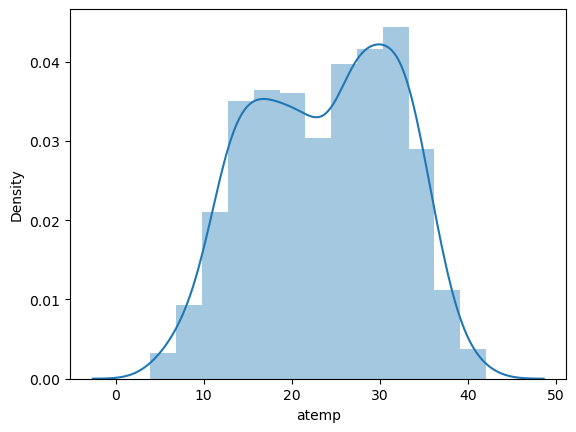

In [17]:
# Adjusted temprature
sns.distplot(bike['atemp'])
plt.show()

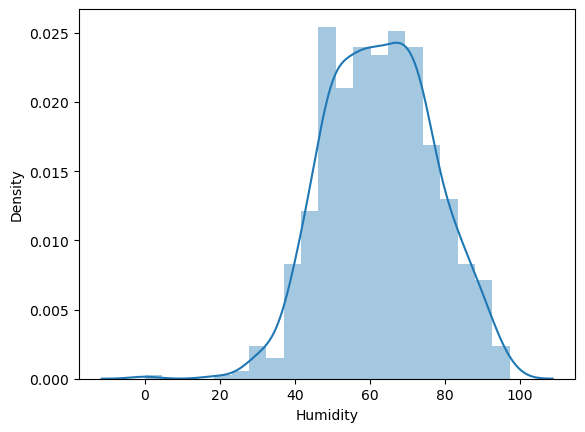

In [18]:
# Humidity
sns.distplot(bike['Humidity'])
plt.show()

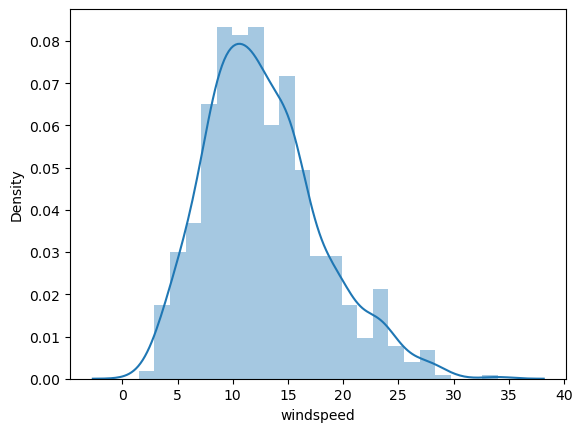

In [19]:
# Wind speed
sns.distplot(bike['windspeed'])
plt.show()

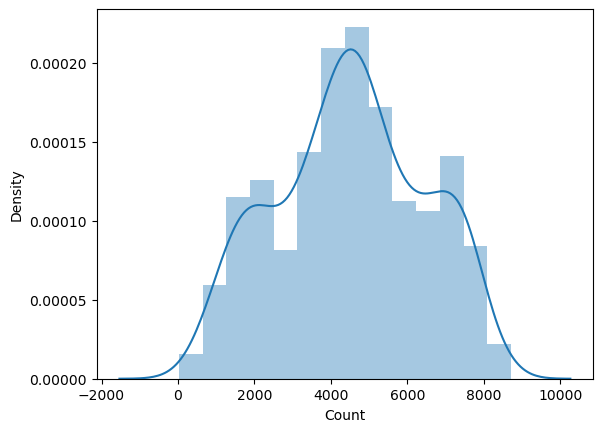

In [20]:
# Total count of bikes registered and casual
sns.distplot(bike['Count'])
plt.show()

In [21]:
# Pairplot of all continuous columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [22]:
IntVariableList = ['Count',]

for var in IntVariableList:
    bike[var] = bike[var].astype("float")

In [23]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 68.6+ KB


In [24]:
# All numeric vars
bike_numeric = bike.select_dtypes(include=['float64'])
bike_numeric.head()

,temp,atemp,Humidity,windspeed,Count
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


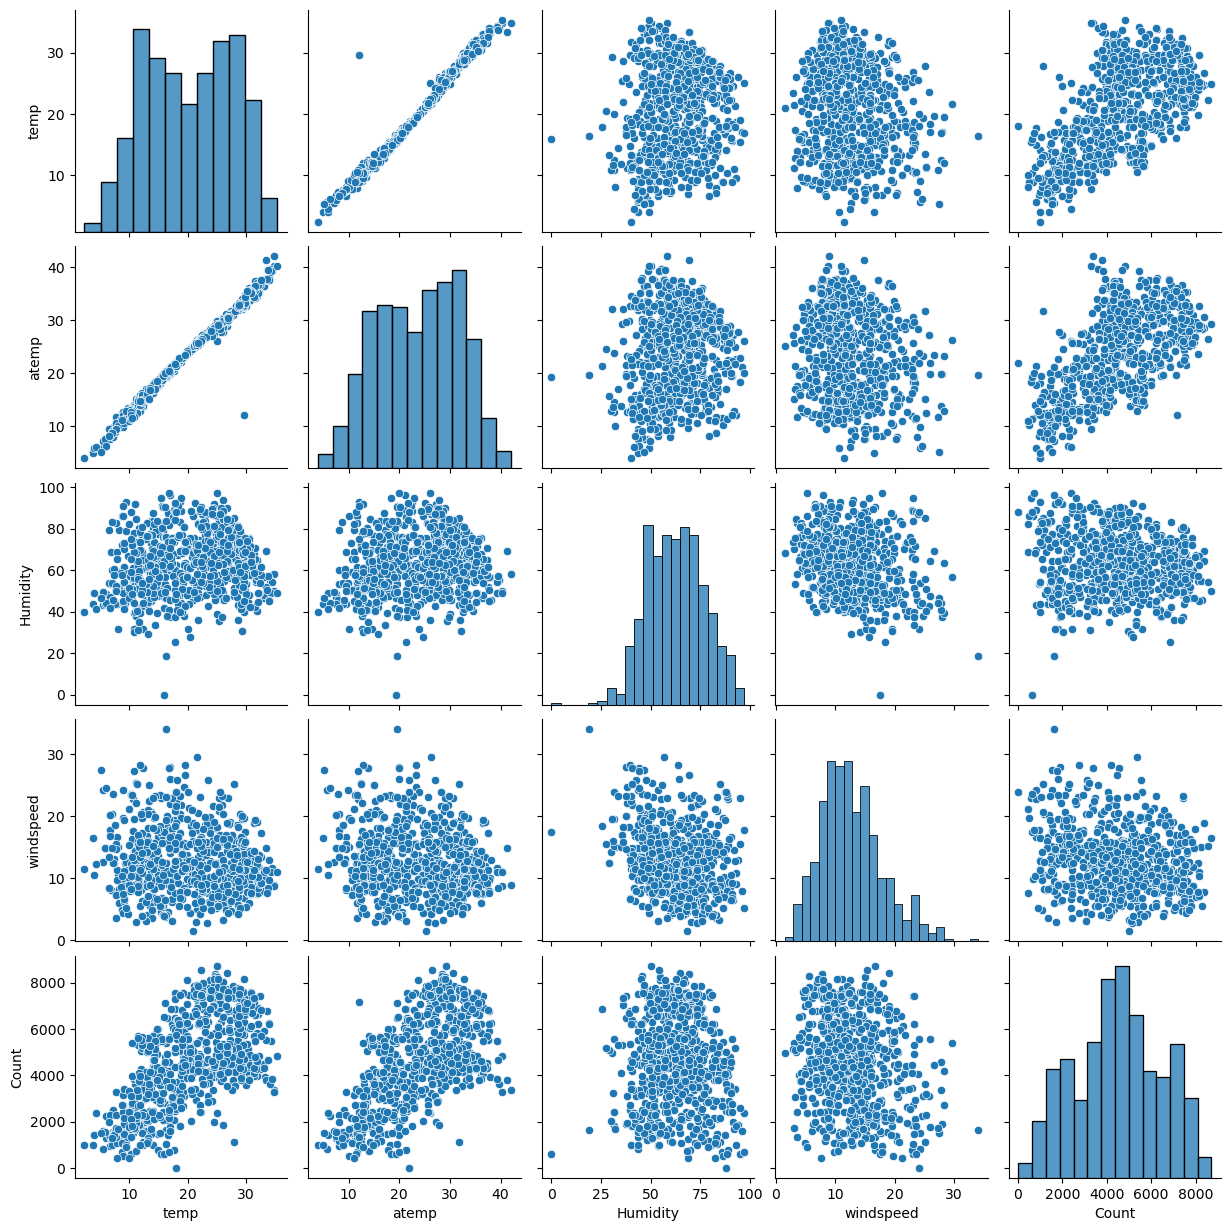

In [25]:
sns.pairplot(bike_numeric)
plt.show()

Observation:

It seems that the 'temp', 'atemp', and 'Count' has a strong relationship with each other.

In [26]:
cor = bike_numeric.corr()
cor

,temp,atemp,Humidity,windspeed,Count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
Humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
Count,0.627044,0.630685,-0.098543,-0.235132,1.000000


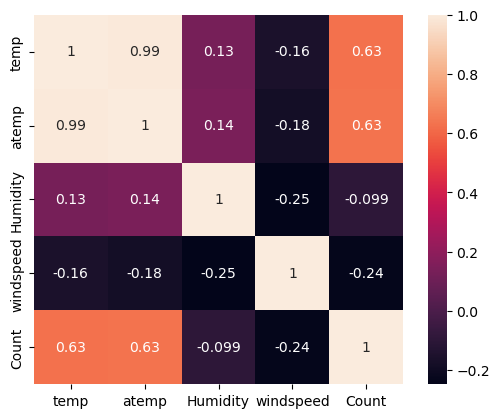

In [27]:
sns.heatmap(cor, square=True, annot=True)
plt.show()

In [28]:
# Dropping the variable 'atemp' as temp and atemp both are similar 
bike.drop('atemp', axis=1, inplace=True)
bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,Humidity,windspeed,Count
0,Spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985.0
1,Spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801.0
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349.0
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562.0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600.0


In [29]:
# Creating catagorical variable
bike_categorical = bike.select_dtypes(exclude=['float64', 'int64'])
bike_categorical

,season,Month,weekday,weathersit
0,Spring,Jan,Monday,Mist
1,Spring,Jan,Tuesday,Mist
2,Spring,Jan,Wednesday,Clear
3,Spring,Jan,Thursday,Clear
4,Spring,Jan,Friday,Clear
...,...,...,...,...
725,Spring,Dec,Friday,Mist
726,Spring,Dec,Saturday,Mist
727,Spring,Dec,Sunday,Mist
728,Spring,Dec,Monday,Clear


In [30]:
# Dummy variables
months = pd.get_dummies(bike.Month, drop_first=True)
seasons = pd.get_dummies(bike.season, drop_first=True)
weatherSit = pd.get_dummies(bike.weathersit, drop_first=True)
Weekdays = pd.get_dummies(bike.weekday, drop_first=True)

In [31]:
bike=pd.concat([months,weatherSit,seasons,Weekdays,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Year,Month,holiday,weekday,workingday,weathersit,temp,Humidity,windspeed,Count
0,False,False,False,True,False,False,False,False,False,False,...,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985.0
1,False,False,False,True,False,False,False,False,False,False,...,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801.0
2,False,False,False,True,False,False,False,False,False,False,...,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349.0
3,False,False,False,True,False,False,False,False,False,False,...,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562.0
4,False,False,False,True,False,False,False,False,False,False,...,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600.0


In [32]:
# Columns after Dummification
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'season',
       'Year', 'Month', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'Humidity', 'windspeed', 'Count'],
      dtype='object')

In [33]:
# Dropping the unwanted catagorical columns
bike.drop(['Month', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Thursday,Tuesday,Wednesday,Year,holiday,workingday,temp,Humidity,windspeed,Count
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0,0,1,14.110847,80.5833,10.749882,985.0
1,False,False,False,True,False,False,False,False,False,False,...,False,True,False,0,0,1,14.902598,69.6087,16.652113,801.0
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,0,0,1,8.050924,43.7273,16.636703,1349.0
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,0,0,1,8.200000,59.0435,10.739832,1562.0
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0,0,1,9.305237,43.6957,12.522300,1600.0


In [34]:
len(bike.columns)

29

In [35]:
# Importing the necessary liabraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Thursday,Tuesday,Wednesday,Year,holiday,workingday,temp,Humidity,windspeed,Count
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0,0,1,14.110847,80.5833,10.749882,985.0
1,False,False,False,True,False,False,False,False,False,False,...,False,True,False,0,0,1,14.902598,69.6087,16.652113,801.0
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,0,0,1,8.050924,43.7273,16.636703,1349.0
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,0,0,1,8.200000,59.0435,10.739832,1562.0
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0,0,1,9.305237,43.6957,12.522300,1600.0


# Model Building and Evaluation

In [37]:
for col in bike:
    if bike[col].dtype=="bool":
        bike[col]=bike[col].astype("float64")

X = bike.drop('Count', axis=1)
y = bike['Count']

In [38]:
# Test Train Split
X_train, X_test = train_test_split(bike, train_size=0.7, random_state=100)

In [39]:
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


In [40]:
scaler=MinMaxScaler()
var = ['temp','Humidity','windspeed','Count']
X_train[var] = scaler.fit_transform(X_train[var])

In [41]:
X_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Thursday,Tuesday,Wednesday,Year,holiday,workingday,temp,Humidity,windspeed,Count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.143137,0.152941,0.135294,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.350557,0.360284,0.342373,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


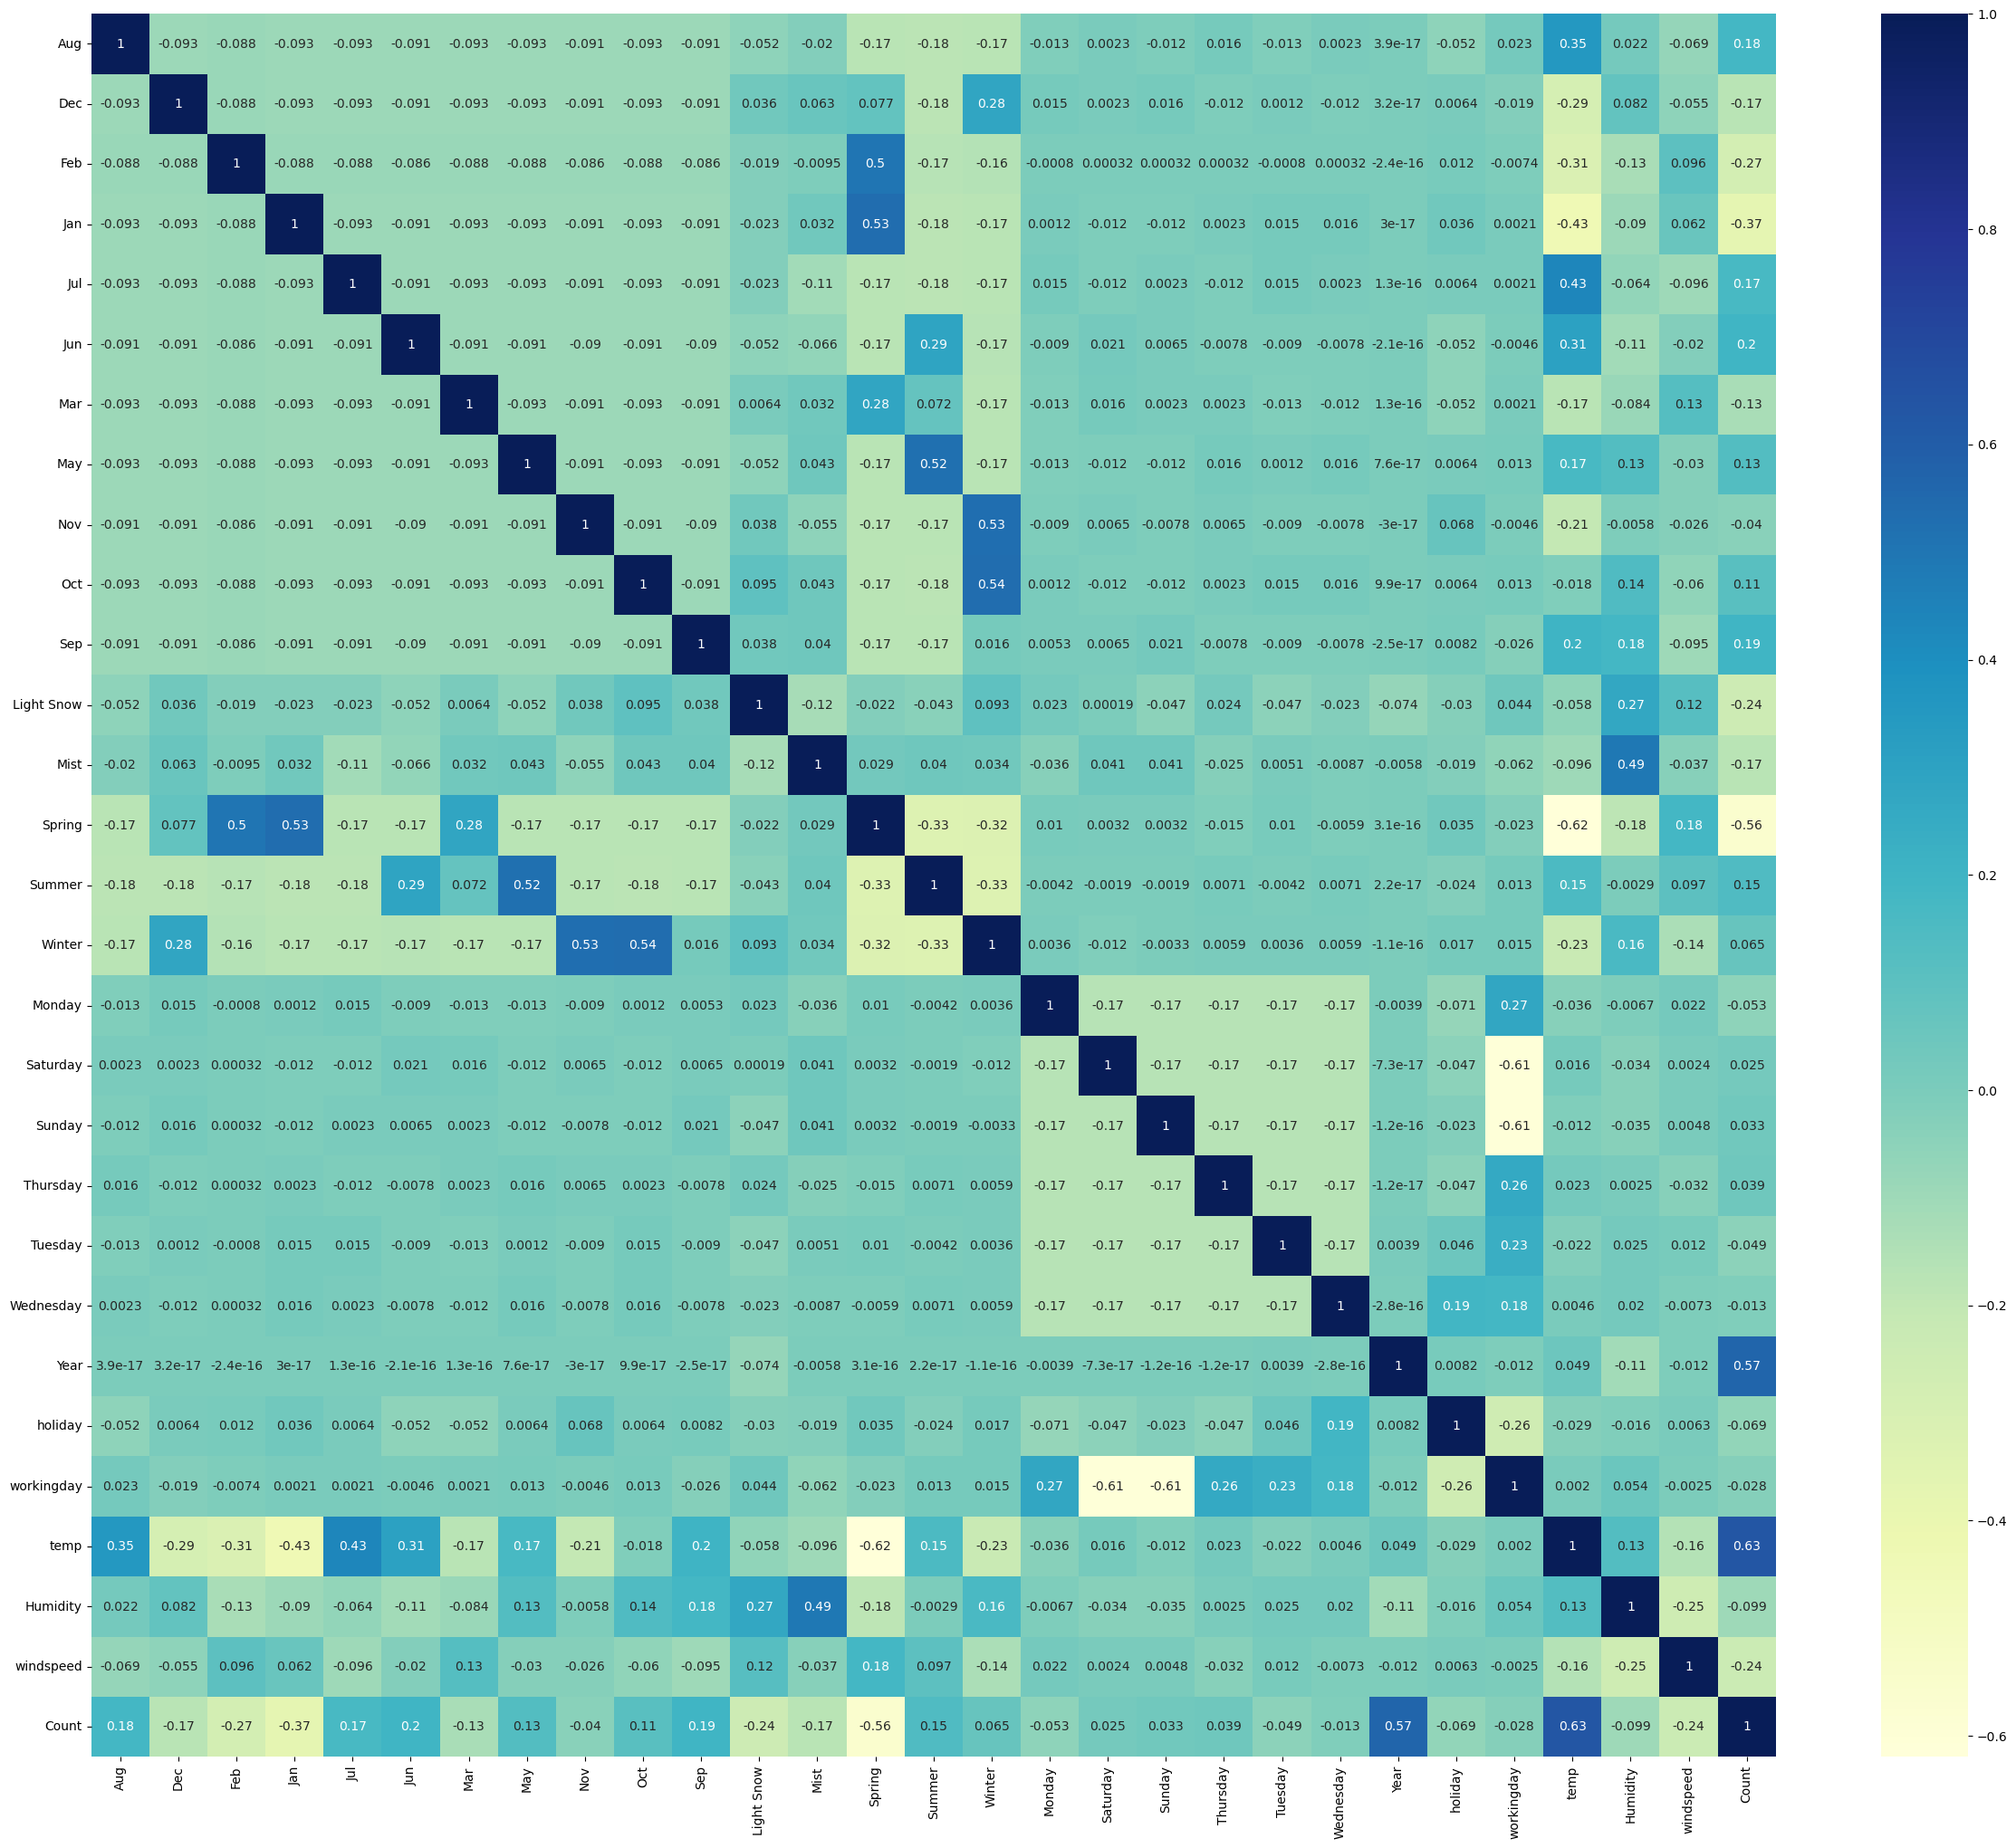

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 25))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Observations:

1. We can observe the multi-colinearity between the variables.
2. Year and temp are strongly correlated with count.
3. Spring is negetively correlated with count.
4. Mist and Humidity are strongly correlated with each other.
5. Weather and their corresponding months are strongly correlated with each other.

In [43]:
# Defining the target variable
y_train = X_train.pop('Count')

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train) 
rfe = RFE (lm,  n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train) 

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1)]

In [46]:
# Creating the functions to build the model and VIF model
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

    
def checkVIF(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [47]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Dec,Jan,Jul,Nov,Sep,Light Snow,Mist,Spring,Summer,Winter,Year,holiday,temp,Humidity,windspeed
576,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.815169,0.725633,0.264686
426,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0.442393,0.640189,0.255342
728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.245101,0.498067,0.663106
482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0.395666,0.504508,0.188475
111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.345824,0.751824,0.380981


In [48]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

# Manual Model Development using statsmodel

# Model 1

In [49]:
# Model-1 (selecting the columns for model 1)

X_train_rfe = ['Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'Spring','Summer', 
               'Winter', 'Dec', 'Jan','Jul', 'Nov', 'Sep', 'Light Snow','Mist']

build_model(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          8.15e-189
Time:                        19:10:27   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

# Model 2

In [50]:
# Model-2 (Dropping the Humidity due to high VIF)

X_train_rfe = ['Year', 'holiday', 'temp', 'windspeed', 'Spring','Summer', 
               'Winter', 'Dec', 'Jan','Jul', 'Nov', 'Sep', 'Light Snow','Mist']

build_model(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          4.75e-186
Time:                        19:10:27   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

# Model 3

In [51]:
# Model-3 (Dropping the Summer season due to high P-value)

X_train_rfe = ['Year', 'holiday', 'temp', 'windspeed', 'Spring', 
               'Winter', 'Dec', 'Jan','Jul', 'Nov', 'Sep', 'Light Snow','Mist']

build_model(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          4.08e-186
Time:                        19:10:27   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2899      0.025     11.426      0.0

# Model 4

In [52]:
# Model-4 (Dropping the month 'Nov' due to high P-value)

X_train_rfe = ['Year', 'holiday', 'temp', 'windspeed', 'Spring', 
               'Winter', 'Dec', 'Jan','Jul', 'Sep', 'Light Snow','Mist']

build_model(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          5.72e-186
Time:                        19:10:27   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2780      0.025     11.102      0.0

# Model 5

In [53]:
# Model-5 (Dropping the month 'Dec' due to high P-value)

X_train_rfe = ['Year', 'holiday', 'temp', 'windspeed', 'Spring', 
               'Winter','Jan','Jul', 'Sep', 'Light Snow','Mist']

build_model(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          2.87e-186
Time:                        19:10:27   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2671      0.025     10.886      0.0

# Model 6

In [54]:
# Model-6 (Dropping the month 'Jan' due to high P-value)

X_train_rfe = ['Year', 'holiday', 'temp', 'windspeed', 'Spring', 
               'Winter','Jul', 'Sep', 'Light Snow','Mist']

build_model(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          3.10e-186
Time:                        19:10:27   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2531      0.024     10.569      0.0

This seems to be a good model as here VIF is less than 5 and P-value is null for all the columns.

# Final Model

In [55]:
# Creating the final model for the feature selected by RFE
def build_model_fn(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

In [56]:
# Building the final model using sklearn
lr1= build_model_fn(X_train[X_train_rfe],y_train)
print(lr1.intercept_, lr1.coef_)

0.2531330823670774 [ 0.23424441 -0.09801375  0.44978915 -0.13951037 -0.11228591  0.04489329
 -0.07293462  0.05731097 -0.28546256 -0.07964992]


# Checking the Final Model

In [57]:
y_train_pred = lr1.predict(X_train[X_train_rfe])

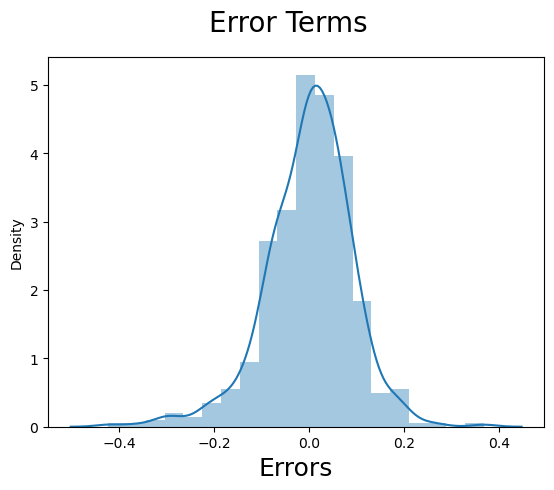

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)  
plt.show()

Error Terms are normally distributed.

# Comparision of target variables with predicted target variables:

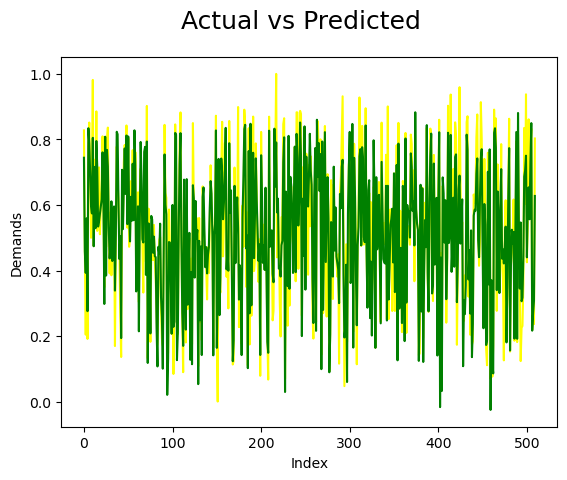

In [59]:
# Actual v/s Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="yellow")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 18)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Model Prediction

In [60]:
# R2 Score 
r2_score(y_train, y_train_pred)

0.8322027416440079

# Applying the scaling on the test sets

In [61]:
X_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Thursday,Tuesday,Wednesday,Year,holiday,workingday,temp,Humidity,windspeed,Count
184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1,0,29.793347,63.7917,5.459106,6043.0
535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,1,32.082500,59.2083,7.625404,6211.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0,0,19.270000,81.2917,13.250121,2659.0
221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,31.433347,42.4167,13.417286,4780.0
152,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,29.315000,30.5000,19.583229,4968.0


In [62]:
num_vars = ['temp', 'Humidity', 'windspeed','Count']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [63]:
# Creating the target variable for test data
y_test=X_test.pop("Count")

In [64]:
# Verifying the test data
X_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Sunday,Thursday,Tuesday,Wednesday,Year,holiday,workingday,temp,Humidity,windspeed
184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,1,0,0.831783,0.657364,0.084219
535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,0,1,0.901354,0.610133,0.153728
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0.511964,0.837699,0.334206
221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0.881625,0.437098,0.339570
152,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0.817246,0.314298,0.537414


In [65]:
# Predicting the test data values
y_test_pred = lr1.predict(X_test[X_train_rfe])

In [66]:
# R2 Score of test and test pred
r2_score(y_test, y_test_pred)

0.8074869048294191

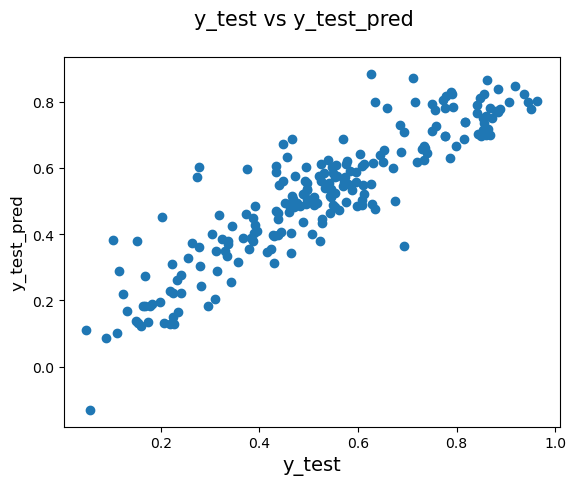

In [67]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 12) 
plt.show()

In [68]:
build_model(X_train_rfe)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          3.10e-186
Time:                        19:10:28   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2531      0.024     10.569      0.0

# Final Observations:

We can use this variables to predict the Demand of Boom Bikes

1. Temprature
2. Wind Speed 
3. Year
4. Season
   -Spring & Winter
5. Months
   -July & September
6. Weathersit
   -Mist & Light Snow
7. Holiday